In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

In [2]:
from data_aggr import CollectData, BattingStats, BatsmanStats

In [3]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [4]:
df = CollectData.get_data()
df.shape

Data read complete for file 0
Data read complete for file 1
Data read complete for file 2
Data read complete for file 3
Data read complete for file 4
Data read complete for file 5
Data read complete for file 6
cleaning data
formatting HS column
formatting Avg column


(1005, 17)

In [5]:
df

,index,POS,Player,Mat,Inns,NO,Runs,Avg,BF,SR,100,50,4s,6s,Year,HS,remained NO during HS
0,0,1,Virat Kohli,16,16,4,973,81.08,640,152.03,4,7,83,38,2016,113,
1,1,2,David Warner,17,17,3,848,60.57,560,151.42,0,9,88,31,2016,93,*
2,2,3,AB de Villiers,16,16,3,687,52.84,407,168.79,1,6,57,37,2016,129,*
3,3,4,Gautam Gambhir,15,15,2,501,38.53,411,121.89,0,5,54,6,2016,90,*
4,4,5,Shikhar Dhawan,17,17,4,501,38.53,429,116.78,0,4,51,8,2016,82,*
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000,157,158,Fazalhaq Farooqi,3,1,1,2,NaN,8,25.00,0,0,0,0,2022,2,*
1001,158,159,Jagadeesha Suchith,5,2,0,2,1.00,8,25.00,0,0,0,0,2022,2,
1002,159,160,Tim Southee,9,5,1,2,0.50,12,16.66,0,0,0,0,2022,1,*
1003,160,161,Nathan Coulter-Nile,1,1,1,1,NaN,2,50.00,0,0,0,0,2022,1,*


In [6]:
df.dtypes

index                      int64
POS                        int64
Player                    object
Mat                        int64
Inns                       int64
NO                         int64
Runs                       int64
Avg                      float64
BF                         int64
SR                       float64
100                        int64
50                         int64
4s                         int64
6s                         int64
Year                       int64
HS                         int64
remained NO during HS     object
dtype: object

In [7]:
BattingStats.agg_for_player(df, )

BattingStats.top_batters(df, 3, 'Avg', 'sum')

,Player,Runs
0,Jos Buttler,863
1,K L Rahul,616
2,Quinton De Kock,508
3,Hardik Pandya,487
4,Shubman Gill,483
...,...,...
157,Jagadeesha Suchith,2
158,Tim Southee,2
159,Harshit Rana,2
160,Anrich Nortje,1


['David Miller', 'Jos Buttler', 'Rajat Patidar', 'Dinesh Karthik']

In [8]:
BattingStats.agg_metric(df,)

BattingStats.total_capped_players(df)

132817

338

In [9]:
METRICS = ['Runs', 'BF', 'HS', 'SR', 'Inns', 'Avg', 'NO', '100', '50', '6s', '4s']
BattingStats.agg_metrics(df, METRICS)

{'Total Runs': 132817,
 'Total BF': 100033,
 'Total Inns': 6595,
 'Total NO': 1538,
 'Total 100': 40,
 'Total 50': 721,
 'Total 6s': 5482,
 'Total 4s': 11692,
 'Highest Individual Score': 140,
 'Highest Strike Rate': 400.0}

In [13]:
BATSMAN = 'pandey'
player = BatsmanStats.search_batsman(df, BATSMAN)
# df_w_rank = BattingStats.get_rank(df, 'Runs')
# df_w_rank
df_search_batsman_result = BatsmanStats.batsman_agg(df, player, METRICS)
df_search_batsman_result
BatsmanStats.current_best_rank(df, player, 'Runs')


,Player,Runs,BF,HS,SR,Inns,Avg,NO,100,50,6s,4s
0,Manish Pandey,2077,1649,83,125.96,77,34.62,17,0,16,62,166


(69.0, 7.0, 2017)

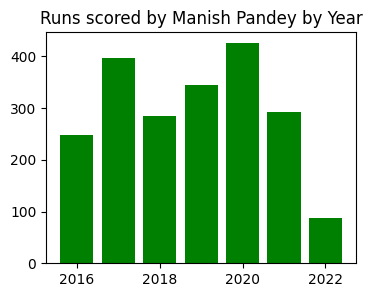

In [15]:
BatsmanStats.bar_plot(df, player, 'Runs')

In [16]:
# validation

df_oneplayer = df.loc[(df['Player'].isin(player)),:]
df_oneplayer

,index,POS,Player,Mat,Inns,NO,Runs,Avg,BF,SR,100,50,4s,6s,Year,HS,remained NO during HS
24,24,25,Manish Pandey,12,11,3,248,31.00,183,135.51,0,2,17,9,2016,52,
142,6,7,Manish Pandey,14,13,5,396,49.50,308,128.57,0,2,28,12,2017,81,*
304,25,26,Manish Pandey,15,13,2,284,25.81,246,115.44,0,3,22,5,2018,62,*
439,22,23,Manish Pandey,12,11,3,344,43.00,263,130.79,0,3,34,6,2019,83,*
573,12,13,Manish Pandey,16,15,2,425,32.69,333,127.62,0,3,35,18,2020,83,*
714,20,21,Manish Pandey,8,8,2,292,48.66,236,123.72,0,3,21,10,2021,69,*
916,73,74,Manish Pandey,6,6,0,88,14.67,80,110.00,0,0,9,2,2022,38,
